In [1]:
import pandas as pd 
import numpy as np

In [2]:
# Adım 1: CSV dosyalarını DataFrame'lere okuma
df1 = pd.read_csv("S&P 500 Historical Data-2.csv")
df2 = pd.read_csv("S&P 500 Historical.csv")

# Adım 2: Kolon isimlerini ve veri tiplerini kontrol etme
print("Birinci dosyanın kolonları:", df1.columns.tolist())
print("İkinci dosyanın kolonları:", df2.columns.tolist())
print("Birinci dosyanın veri tipleri:\n", df1.dtypes)
print("İkinci dosyanın veri tipleri:\n", df2.dtypes)

# Adım 3: DataFrame'leri birleştirme
# Tarih sırasına dikkat ederek birleştirme yapacağız, ancak önce birleştirip sonra sıralayacağız
merged_df = pd.concat([df1, df2], ignore_index=True)

# Adım 4: 'Date' sütununu datetime formatına çevirme ve tarihe göre sıralama
merged_df['Date'] = pd.to_datetime(merged_df['Date'], format='%m/%d/%Y')
merged_df = merged_df.sort_values(by='Date')

# Adım 5: Birleştirilmiş veriyi yeni bir CSV dosyasına kaydetme
merged_df.to_csv("Merged_S&P_500_Historical_Data.csv", index=False)

# İlk birkaç satırı kontrol amaçlı yazdırma
print("Birleştirilmiş verinin ilk birkaç satırı:\n", merged_df.head())

Birinci dosyanın kolonları: ['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']
İkinci dosyanın kolonları: ['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']
Birinci dosyanın veri tipleri:
 Date         object
Price        object
Open         object
High         object
Low          object
Vol.        float64
Change %     object
dtype: object
İkinci dosyanın veri tipleri:
 Date         object
Price        object
Open         object
High         object
Low          object
Vol.        float64
Change %     object
dtype: object
Birleştirilmiş verinin ilk birkaç satırı:
            Date   Price    Open    High     Low  Vol. Change %
6724 1990-01-02  359.70  353.40  359.70  352.00   NaN    1.78%
6723 1990-01-03  358.80  359.70  360.60  357.90   NaN   -0.25%
6722 1990-01-04  355.70  358.80  358.80  352.90   NaN   -0.86%
6721 1990-01-05  352.20  355.70  355.70  351.40   NaN   -0.98%
6720 1990-01-08  353.80  352.20  354.20  350.50   NaN    0.45%


In [4]:
merged_df.to_csv('US500.csv',index=False)

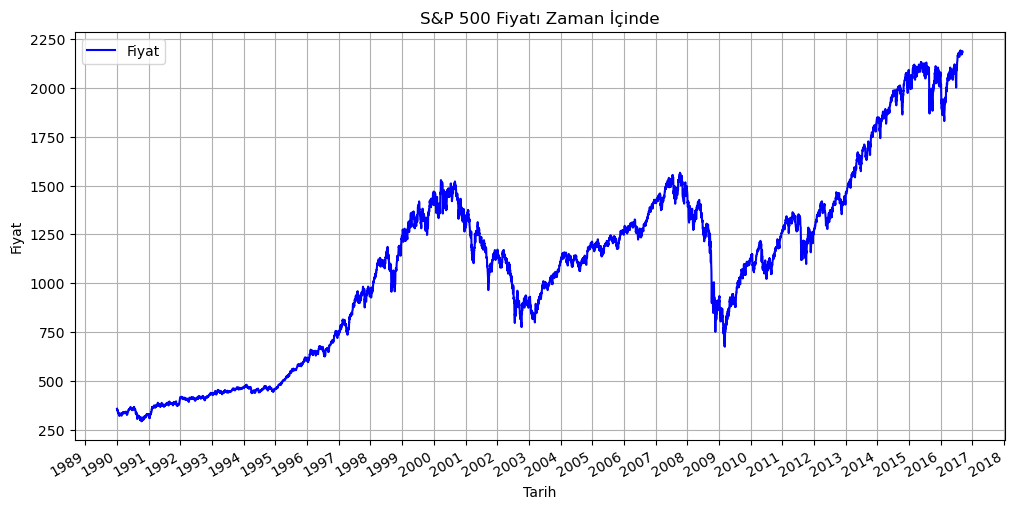

In [9]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df = merged_df.copy()

# Verileri hazırla
# 'Date' sütununu datetime formatına çevir
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# 'Price' sütununu sayısal formata çevir (virgülleri kaldırarak)
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''), errors='coerce')

# Grafiği çiz
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Price'], color='blue', label='Fiyat')

# Tarih formatını ayarla
# X-ekseninde her yılı göster
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Tarih etiketlerini döndür ve hizala
plt.gcf().autofmt_xdate()

# Grafiği özelleştir
plt.title('S&P 500 Fiyatı Zaman İçinde')
plt.xlabel('Tarih')
plt.ylabel('Fiyat')
plt.grid(True)
plt.legend()

# Grafiği göster
plt.show()